# Replication of the split conformal prediction algorithms

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from utils.plot_utils import regression_plot_with_uncertainty


In [2]:
def construct_prediction_bands(mean_prediction, quantiles):
    """
    A function that returns the lower and upper prediction bands for every quantile in quantiles.
    """
    
    prediction_bands = np.zeros((len(mean_prediction), 2, len(quantiles)))

    for i, q in enumerate(quantiles):
        prediction_bands[:, :, i] = np.stack([
            mean_prediction - q,
            mean_prediction + q
        ], axis=1)

    return prediction_bands

In [19]:
def f(x):
    return 8 * x + 1 

In [20]:
def generate_homo_data(n_samples, sigma = 0.1, random_state = 42):
    np.random.seed(random_state)
    X = np.linspace(0, 1, n_samples)[:, np.newaxis]
    y = f(X) + np.random.normal(0 ,sigma, (n_samples, 1))
    y_gt = f(X)
    return X, y.ravel(), y_gt.ravel()

In [21]:
sigma = 0.5
X, y, y_gt = generate_homo_data(500, sigma)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train, X_cal, y_train, y_cal = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [22]:
len(X_cal)

90

In [23]:
print(f"Expected number of points outside the 95% error bars: {len(X_cal) * 0.05}")

Expected number of points outside the 95% error bars: 4.5


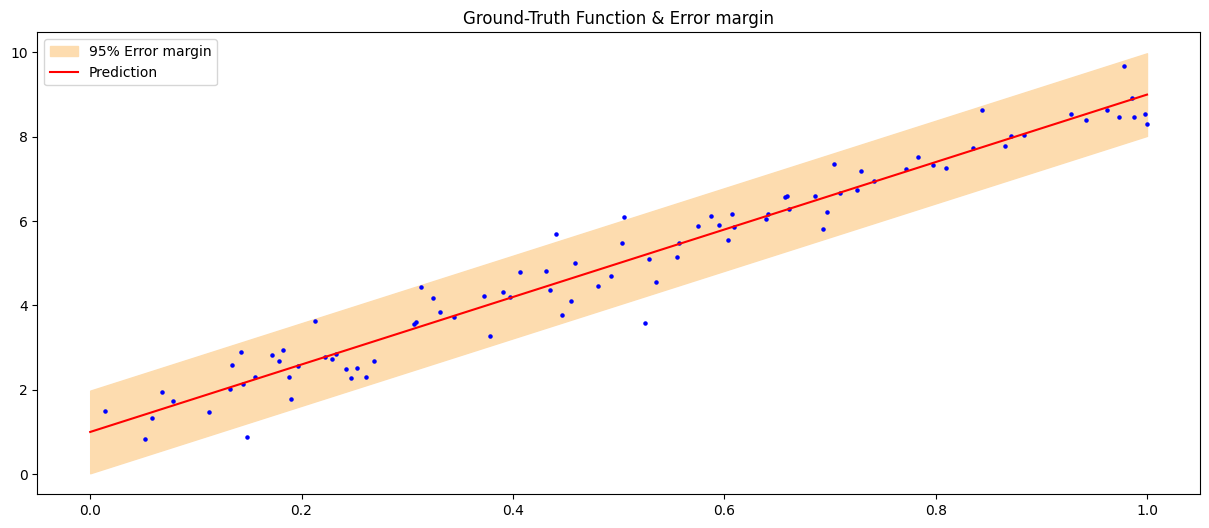

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6)) 

q975 = scipy.stats.norm.ppf(0.975)
prediction_bands = construct_prediction_bands(y_gt, [sigma * q975])
regression_plot_with_uncertainty(ax, X, y_gt, prediction_bands, (X_cal, y_cal), labels = ["95% Error margin"])
ax.set_title("Ground-Truth Function & Error margin")
plt.show()
